<a href="https://colab.research.google.com/github/KavinyaMahesh/Design-and-analysis-of-algo/blob/main/daa_lab_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

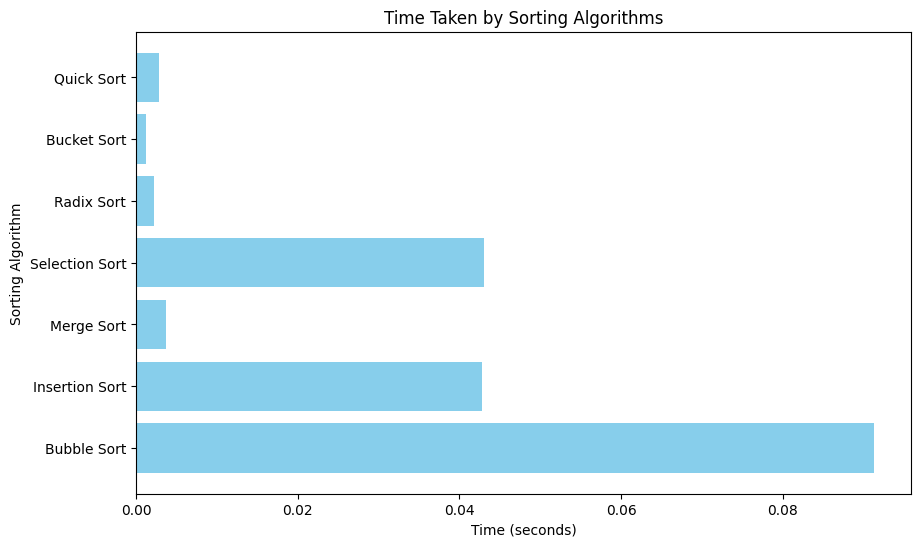

In [ ]:
#1
import time
import random
import matplotlib.pyplot as plt
import numpy as np

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key

def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr)//2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def radix_sort(arr):
    def counting_sort(arr, exp):
        n = len(arr)
        output = [0] * n
        count = [0] * 10

        for i in range(n):
            index = arr[i] // exp
            count[index % 10] += 1

        for i in range(1, 10):
            count[i] += count[i - 1]

        i = n - 1
        while i >= 0:
            index = arr[i] // exp
            output[count[index % 10] - 1] = arr[i]
            count[index % 10] -= 1
            i -= 1

        i = 0
        for i in range(len(arr)):
            arr[i] = output[i]

    max_num = max(arr)
    exp = 1
    while max_num // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

def bucket_sort(arr):
    def insertion_sort(arr):
        for i in range(1, len(arr)):
            key = arr[i]
            j = i - 1
            while j >= 0 and key < arr[j]:
                arr[j + 1] = arr[j]
                j -= 1
            arr[j + 1] = key

    bucket_size = 10
    max_val, min_val = max(arr), min(arr)
    bucket_count = (max_val - min_val) // bucket_size + 1
    buckets = [[] for _ in range(bucket_count)]

    for num in arr:
        idx = (num - min_val) // bucket_size
        buckets[idx].append(num)

    for i in range(bucket_count):
        insertion_sort(buckets[i])

    k = 0
    for i in range(bucket_count):
        for j in range(len(buckets[i])):
            arr[k] = buckets[i][j]
            k += 1

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# Generating 1000 random numbers
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

# Timing sorting algorithms
sorting_algorithms = {
    "Bubble Sort": bubble_sort,
    "Insertion Sort": insertion_sort,
    "Merge Sort": merge_sort,
    "Selection Sort": selection_sort,
    "Radix Sort": radix_sort,
    "Bucket Sort": bucket_sort,
    "Quick Sort": quick_sort
}

timings = {}
for algo_name, algo_func in sorting_algorithms.items():
    start_time = time.time()
    algo_func(random_numbers.copy())
    end_time = time.time()
    timings[algo_name] = end_time - start_time

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(list(timings.keys()), list(timings.values()), color='skyblue')
plt.xlabel('Time (seconds)')
plt.ylabel('Sorting Algorithm')
plt.title('Time Taken by Sorting Algorithms')
plt.show()


In [ ]:
#2
import heapq

def merge_sorted_lists(lists):
    result = []
    heap = []

    for i, lst in enumerate(lists):
        if lst:
            heapq.heappush(heap, (lst[0], i, 0))

    while heap:
        val, lst_idx, idx = heapq.heappop(heap)
        result.append(val)
        if idx + 1 < len(lists[lst_idx]):
            next_tuple = (lists[lst_idx][idx + 1], lst_idx, idx + 1)
            heapq.heappush(heap, next_tuple)

    return result

lists = [
    [10,20,30,40],
    [15,25,35],
    [27,29,37,48,93],
    [32,33]
]

print(merge_sorted_lists(lists))


[10, 15, 20, 25, 27, 29, 30, 32, 33, 35, 37, 40, 48, 93]


In [ ]:
#3
def find_k_largest(arr, k):
    arr.sort()
    return arr[-k:]

arr = [3, 10, 4, 5, 6, 7]
k = 3
print(find_k_largest(arr, k))


[6, 7, 10]


In [ ]:
#4
def max_activities(activities):
    activities.sort(key=lambda x: x[1])
    selected = [activities[0]]

    for i in range(1, len(activities)):
        if activities[i][0] >= selected[-1][1]:
            selected.append(activities[i])

    return selected

activities = [(1,4), (3,5), (0,6), (5,7), (3,8), (5,9), (3,8), (5,9), (6,10), (8,11), (8,12), (2,13), (12,14)]
print(max_activities(activities))


[(1, 4), (5, 7), (8, 11), (12, 14)]


In [ ]:
#5
def merge_intervals(intervals):
    if not intervals:
        return []

    intervals.sort(key=lambda x: x[0])
    merged = [intervals[0]]

    for start, end in intervals[1:]:
        if start <= merged[-1][1]:
            merged[-1] = (merged[-1][0], max(merged[-1][1], end))
        else:
            merged.append((start, end))

    return merged

intervals = [(1,4), (2,5), (7,8), (6,9)]
print(merge_intervals(intervals))


[(1, 5), (6, 9)]
